<a href="https://colab.research.google.com/github/diogo-costa-silva/eda-python-projects/blob/main/google_play_store_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Play Store Analysis using Python

The objective of this project is to **deliver insights to understand customer demands better** and thus **help developers to popularize the product**. The [dataset](https://www.kaggle.com/datasets/lava18/google-play-store-apps) is chosen from [Kaggle](https://kaggle.com/).

It is of 10k Play Store apps for analyzing the Android market. This dataset contains details of different applications and reviews from different users.

This notebook is based on other projects that I've found:
- [Google Play Store Analysis (EDA)](https://medium.com/@ritz1602.rs/google-play-store-analysis-eda-4321dc6d36df)

<br>

Here's a brief outline of the steps we'll follow according to CRISP-DM, adjusted for EDA:

1. Business Understanding: Define the objectives and requirements from a business perspective.
2. Data Understanding: Start by collecting the data and proceed with exploring and understanding its properties.
3. Data Preparation: Clean and preprocess the data to get it ready for analysis.
4. Data Exploration (EDA): Use statistics and visualization techniques to discover patterns, insights, and relationships in the data.
5. Evaluation: Evaluate the findings and communicate the results.
6. Deployment: In the context of EDA, this could mean compiling a report or presentation.

## 0. Importing Libraries and Data Loading

In [2]:
%pip install opendatasets kaggle -q

In [3]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/lava18/google-play-store-apps'

od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dccsilva
Your Kaggle Key: ··········


100%|██████████| 1.94M/1.94M [00:00<00:00, 78.9MB/s]

In [4]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
# Loading the data
google_play_store_df  = pd.read_csv('/content/google-play-store-apps/googleplaystore.csv')
user_reviews_df = pd.read_csv('/content/google-play-store-apps/googleplaystore_user_reviews.csv')


## 1. Business Understanding

The objective here is to understand more about the Google Play Store's ecosystem, focusing on aspects such as app categories, ratings, reviews, and installations, to identify patterns or trends that could help developers or business stakeholders make informed decisions.

Here are several types of analyses and questions we might want to explore to understand the complete picture:

### 1.1. App Distribution and Categories:

* How are apps distributed across different categories?
* Which categories have the most apps?

### 1.2. App Ratings:

* What is the distribution of app ratings?
* How do app ratings vary across different categories?
* Are there significant differences in ratings between paid and free apps?

### 1.3. App Reviews and Sentiments:

* What is the correlation between the number of reviews and app ratings?
* What are the common sentiments in user reviews across top-rated and low-rated apps?

### 1.4. App Size and Pricing:

* How does the size of an app relate to its rating?
* What are the trends in app pricing across different categories? Are higher-priced apps rated better?

### 1.5. User Engagement and Popularity:

* Which apps are the most installed/downloaded?
* How does the number of installations vary across different categories?

### 1.6. Time Analysis:

* Is there any trend indicating that certain types of apps become more popular at specific times of the year?

### 1.7. Content Rating:

* What is the distribution of apps across different content ratings (Everyone, Teen, Mature, etc.)?
* Does content rating affect the number of installations or ratings?


By answering these questions, we can gain a comprehensive understanding of the Google Play Store's environment, helping developers or business stakeholders make informed decisions regarding app development, marketing strategies, and user engagement.

## 2. Data Understanding

This step is about getting to know the data and understanding what has to be done before the data becomes useful in a particular context. This can be done by reading the CSV file and doing initial statistical analysis.

Though the dataset may seem to have the correct datatypes for each column, we need to check it. Inconsistent datatypes will create issues while dealing with problems.

### 2.1. Checking what columns are there in the dataset


In [7]:
google_play_store_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

### 2.2. Checking Number of columns and rows

In [8]:
google_play_store_df.shape

(10841, 13)

In [9]:
google_play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### 2.3. Descriptive statistics

In [10]:
google_play_store_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


## 3. Data Cleaning

Data preparation is the process of cleaning and transforming raw data prior to processing and analysis. It is an important step prior to processing and often involves reformatting data, making corrections to data and the combining of data sets to enrich data.

This step is crucial for removing faulty data and filling in gaps. Important tasks here includes:

- Removing extraneous data
- Filling in missing values.
- Conforming data to a standardized pattern.


### 3.1. Removing row 10472 due to data mismatch in the column

In [12]:
# Row 10472 removed due to missing value of Category
google_play_store_df.drop(google_play_store_df.index[10472], inplace=True)

### 3.2. Removing '+' from the values of number of installs and converting it to numeric

In [13]:
google_play_store_df['Installs'] = google_play_store_df['Installs'].map(lambda x: x.rstrip('+'))

In [14]:
google_play_store_df['Installs'] = pd.to_numeric(google_play_store_df['Installs'].str.replace(',',''))


### 3.3. Removing '$' from the values of Price and converting it to numeric

In [15]:
google_play_store_df['Price'] = pd.to_numeric(google_play_store_df['Price'].str.replace('$',''))


<ipython-input-15-61879e84faea>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  google_play_store_df['Price'] = pd.to_numeric(google_play_store_df['Price'].str.replace('$',''))


In [16]:
google_play_store_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


### 3.4. Removing duplicates

In [19]:
# Checking if the dataframe contains any duplicate values for the same App name
sameApp = google_play_store_df['App'].duplicated().any()
sameApp

True

In [20]:
google_play_store_df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9659, dtype: int64

As we can see from the above mentioned data, some of the apps are having multiple rows. Let's check out if there data is identical or not.

In [21]:
google_play_store_df[google_play_store_df['App']=='ROBLOX']


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,log_installs
1653,ROBLOX,GAME,4.5,4447388,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,8.0
1701,ROBLOX,GAME,4.5,4447346,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,8.0
1748,ROBLOX,GAME,4.5,4448791,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,8.0
1841,ROBLOX,GAME,4.5,4449882,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,8.0
1870,ROBLOX,GAME,4.5,4449910,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,8.0
2016,ROBLOX,FAMILY,4.5,4449910,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,8.0
2088,ROBLOX,FAMILY,4.5,4450855,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,8.0
2206,ROBLOX,FAMILY,4.5,4450890,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,8.0
4527,ROBLOX,FAMILY,4.5,4443407,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,8.0


As we can see from the above example, the ROBLOX app has identical rows with difference in number of reviews. It may have happened that for the same app, the data has been scraped in different points of time. So we have kept row of an app with maximum number of reviews, assuming it to be the latest one.

In [22]:
google_play_store_df.drop_duplicates(inplace=True)


### 3.5. Converting type of Reviews column to number

In [24]:
google_play_store_df['Reviews'] = pd.to_numeric(google_play_store_df['Reviews'].str.replace('$',''))


<ipython-input-24-e19e9cfcbab6>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  google_play_store_df['Reviews'] = pd.to_numeric(google_play_store_df['Reviews'].str.replace('$',''))


In [25]:
google_play_store_df = google_play_store_df.loc[google_play_store_df.groupby(['App'])['Reviews'].idxmax()]


## 4. Data Transforming

Transforming data is the process of updating the format or value entries in order to reach a well-defined outcome, or to make the data more easily understood by a wider audience.

In [ ]:
google_play_store_df['Installs'].min(),google_play_store_df['Installs'].max()


As we can notice, there is a **high variance** in the number of installs. To remove this we are adding a new column to dataframe, which is the **log(base10) of number of installs**.

In [ ]:
google_play_store_df['log_installs'] = np.log10(google_play_store_df['Installs'])

Size of the applications present in the datset are in MB and KB. Therefore for ease in data processing, converting entire size column to MB.



In [27]:
# Converting KB to MB
google_play_store_df['Size'] = google_play_store_df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
google_play_store_df['Size'] = google_play_store_df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
google_play_store_df['Size'] = google_play_store_df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
google_play_store_df['Size'] = google_play_store_df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
google_play_store_df['Size'] = google_play_store_df['Size'].apply(lambda x: float(x))

## 5. Exploratory Analysis and Visualization

Exploratory data visualizations (EDVs) are the type of visualizations we assemble when we do not have a clue about what information lies within our dataset.

In [26]:
# Setting up the parameters for the plots

sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

### 5.1. What are the top 20 apps present in the google play store as per their Genres?

In [28]:
top_genres = google_play_store_df.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})

In [29]:
genres_installs = google_play_store_df.groupby(['Genres'])[['Installs']].sum()


In [30]:
top_genres_installs = pd.merge(top_genres, genres_installs, on='Genres')
top_20_genres_installs = top_genres_installs.head(20)

<ipython-input-33-79c0cbdb8228>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_genres_installs.Genres, y=top_20_genres_installs.Count, palette='viridis')


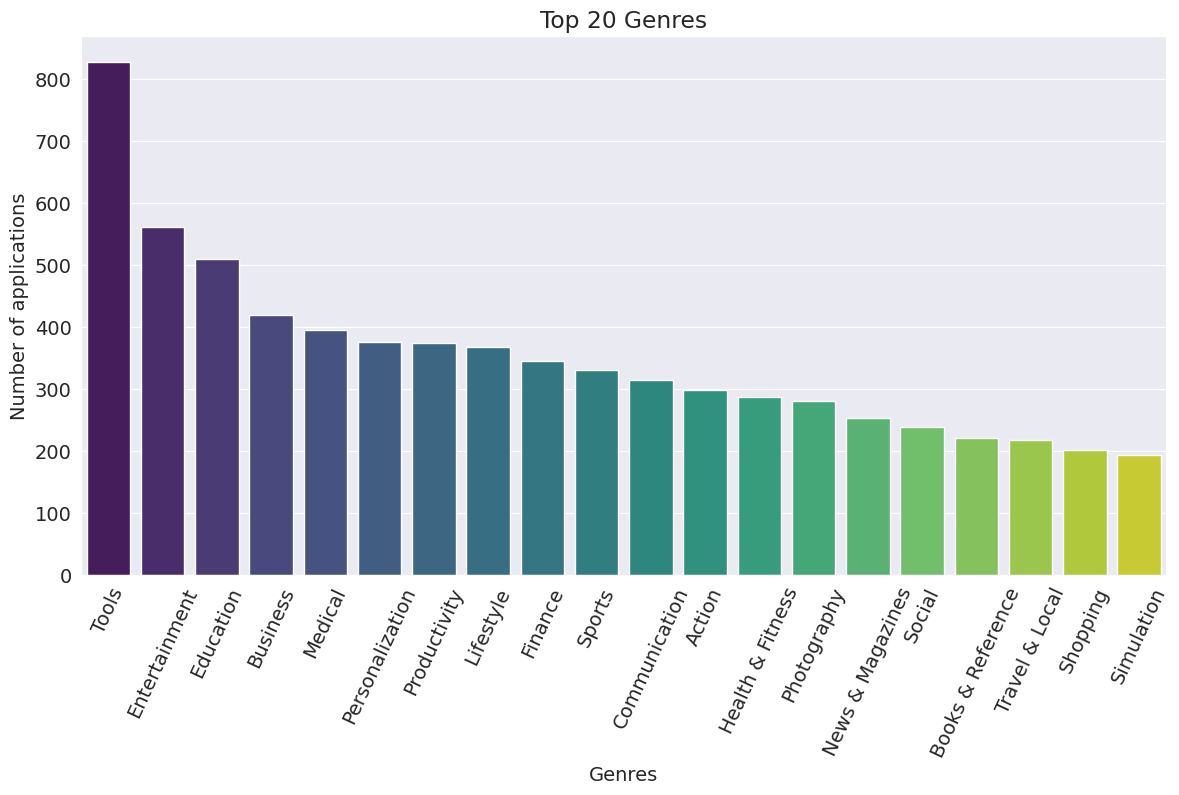

In [33]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Number of applications")
plt.title("Top 20 Genres")
sns.barplot(x=top_20_genres_installs.Genres, y=top_20_genres_installs.Count, palette='viridis')
plt.show()


### 5.2. Which are the Genres that are getting installed the most in top 20 Genres?

<ipython-input-34-09a6d76a8073>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_genres_installs.Genres, y=top_20_genres_installs.Installs, palette='viridis')


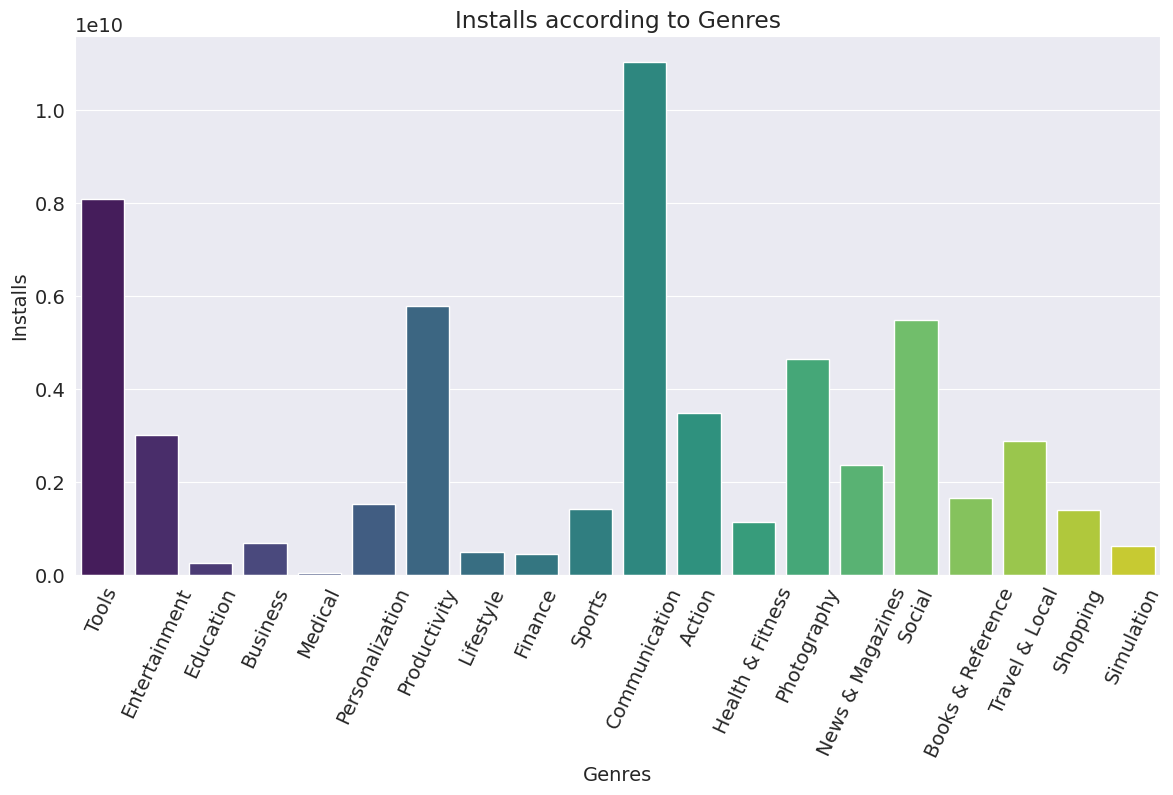

In [34]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Installs")
plt.title("Installs according to Genres")
sns.barplot(x=top_20_genres_installs.Genres, y=top_20_genres_installs.Installs, palette='viridis')
plt.show()

As we can see from the above two plots: <u>Maxinum number of apps</u> present in google play store comes under <u>Tools</u>, <u>Entertainment</u> and <u>Education</u> Genres but as per the <u>installation</u> and requirement in the market plot, scenario is not the same. Maximum installed apps comes under <u>Communication</u>, <u>Tools</u> and <u>Productivity</u> Genres.

### 5.3. Count of apps in each category

In [35]:
top_category = google_play_store_df.Category.value_counts().reset_index().rename(columns={'Category':'Count','index':'Category'})

In [36]:
category_installs = google_play_store_df.groupby(['Category'])[['Installs']].sum()

In [37]:
top_category_installs = pd.merge(top_category, category_installs, on='Category')
top_20_category_installs = top_category_installs

<ipython-input-38-6bf483e31fee>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_category_installs.Category, y=top_20_category_installs.Count, palette='viridis')


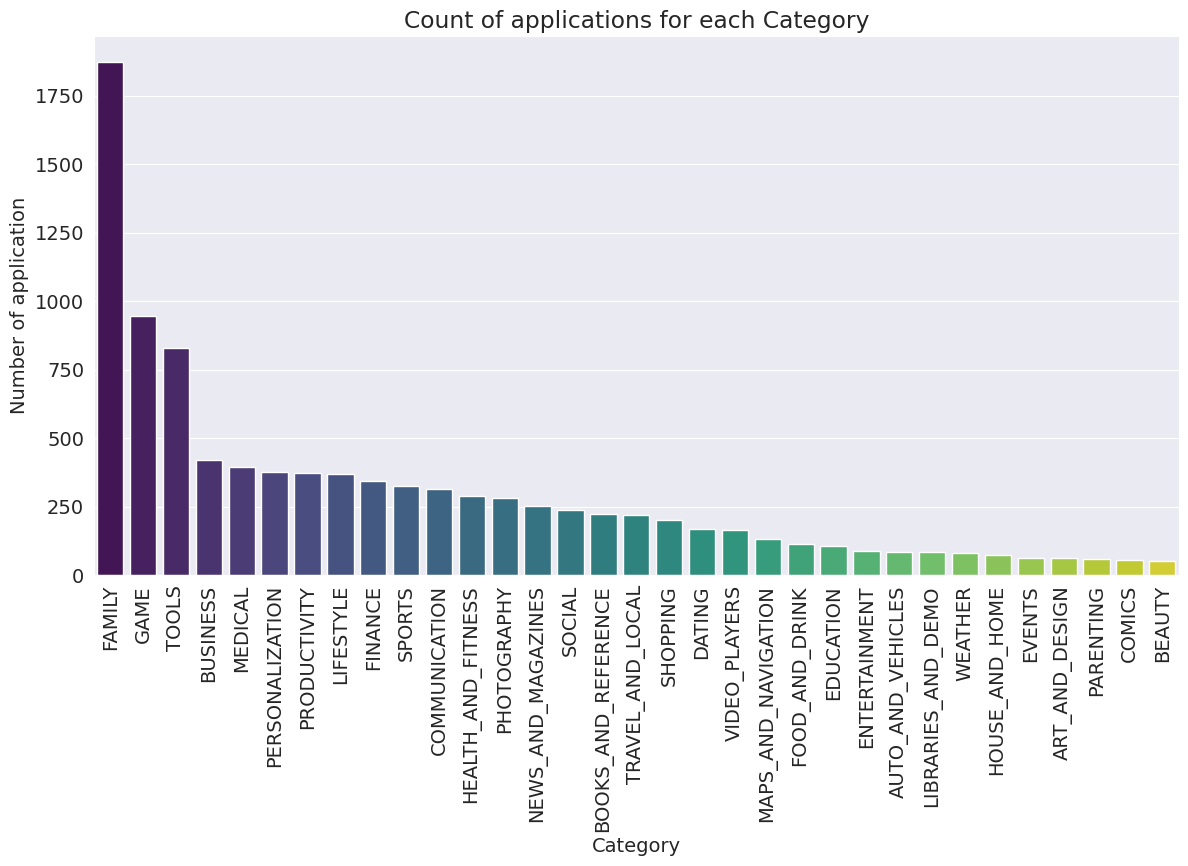

In [38]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Number of application")
plt.title("Count of applications for each Category")
sns.barplot(x=top_20_category_installs.Category, y=top_20_category_installs.Count, palette='viridis')
plt.show()

### 5.4. Number of Installed applications for each category

<ipython-input-39-1112bfca0613>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_category_installs.Category, y=top_20_category_installs.Installs, palette='viridis')


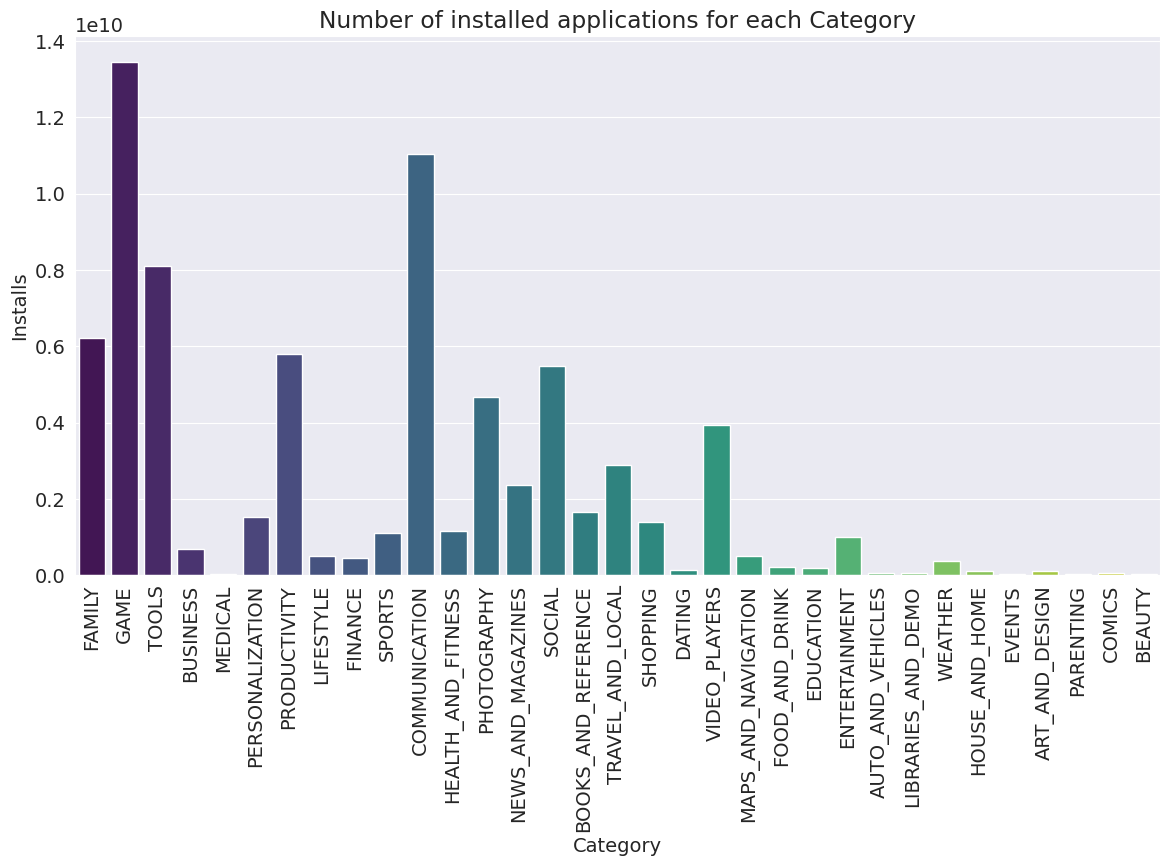

In [39]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Number of installed applications for each Category")
sns.barplot(x=top_20_category_installs.Category, y=top_20_category_installs.Installs, palette='viridis')
plt.show()

As we can see from the above two plots: Maxinum number of apps present in google play store comes under Family, Games and Tools Category but as per the installation and requirement in the market plot, scenario is not the same. Maximum installed apps comes under Games,  Communication and Tools.

### 5.5. Distribution of App Rating

In [40]:
genres_ratings_df = google_play_store_df.groupby(['Genres'])[['Rating']].mean()

In [41]:
genres_installs_ratings = pd.merge(top_genres_installs, genres_ratings_df, on='Genres')

In [42]:
genres_installs_ratings['Rating'].describe()

count    114.000000
mean       4.248546
std        0.182448
min        3.800000
25%        4.127083
50%        4.246502
75%        4.344442
max        4.800000
Name: Rating, dtype: float64

<ipython-input-43-390102fb5a10>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(genres_installs_ratings.Rating, color="Red", shade = True)


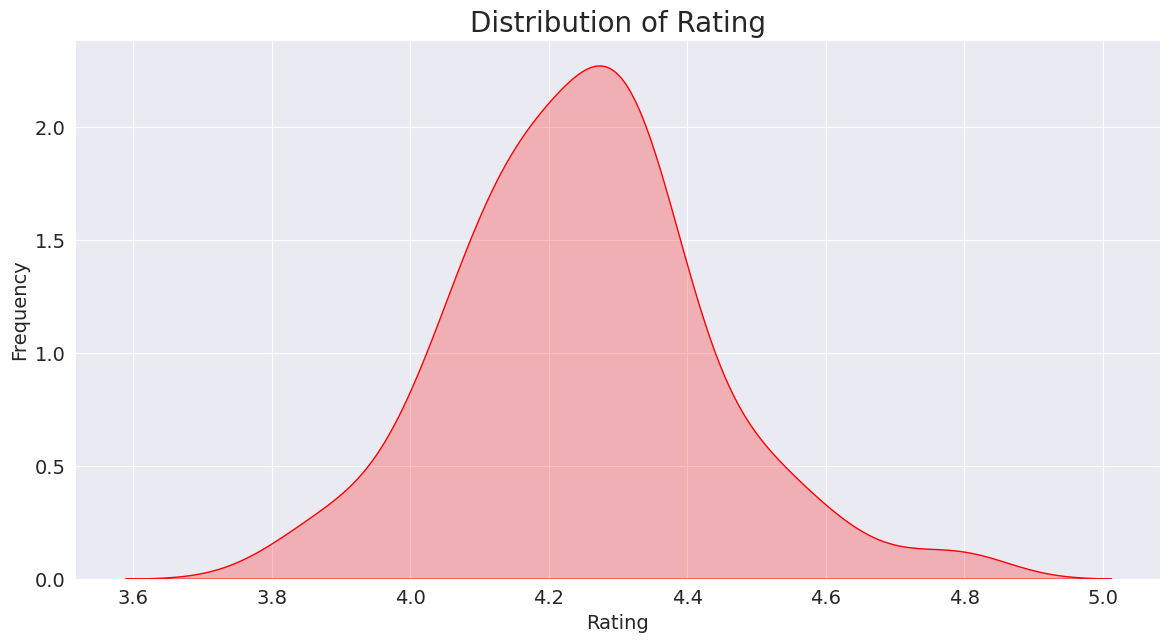

In [43]:
plt.figure(figsize=(14,7))
g = sns.kdeplot(genres_installs_ratings.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)
plt.show()

Average rating of application in store is around 4.3, which is very high. This plot can be used to look whether the original ratings of the app matches the predicted rating to know whether the app is performing better or worse compared to other apps on the Play Store.

### 5.6. Highest and lowest rated Genres

In [44]:
genres_installs_ratings.sort_values('Rating', ascending =False, inplace=True)

In [45]:
highest_rated_genres = genres_installs_ratings.iloc[0:20]
lowest_rated_genres = genres_installs_ratings.iloc[-20:]
lowest_rated_genres = lowest_rated_genres[lowest_rated_genres['Rating'].notnull()]

<ipython-input-47-ee3d17e848e9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=highest_rated_genres.Genres, y=highest_rated_genres.Rating, palette='viridis')


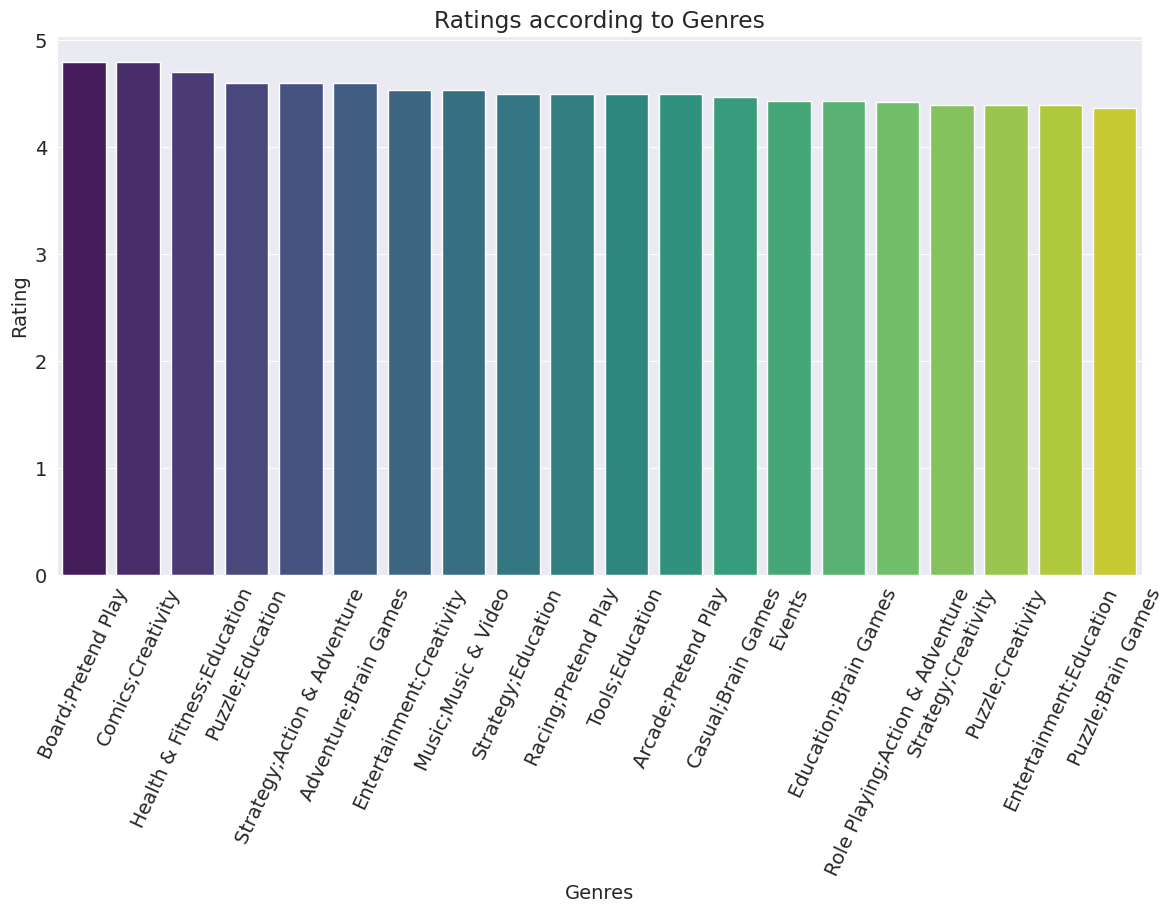

In [47]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Rating")
plt.title("Ratings according to Genres")
sns.barplot(x=highest_rated_genres.Genres, y=highest_rated_genres.Rating, palette='viridis')
plt.show()

<ipython-input-48-9500093dc78c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lowest_rated_genres.Genres, y=lowest_rated_genres.Rating, palette='viridis')


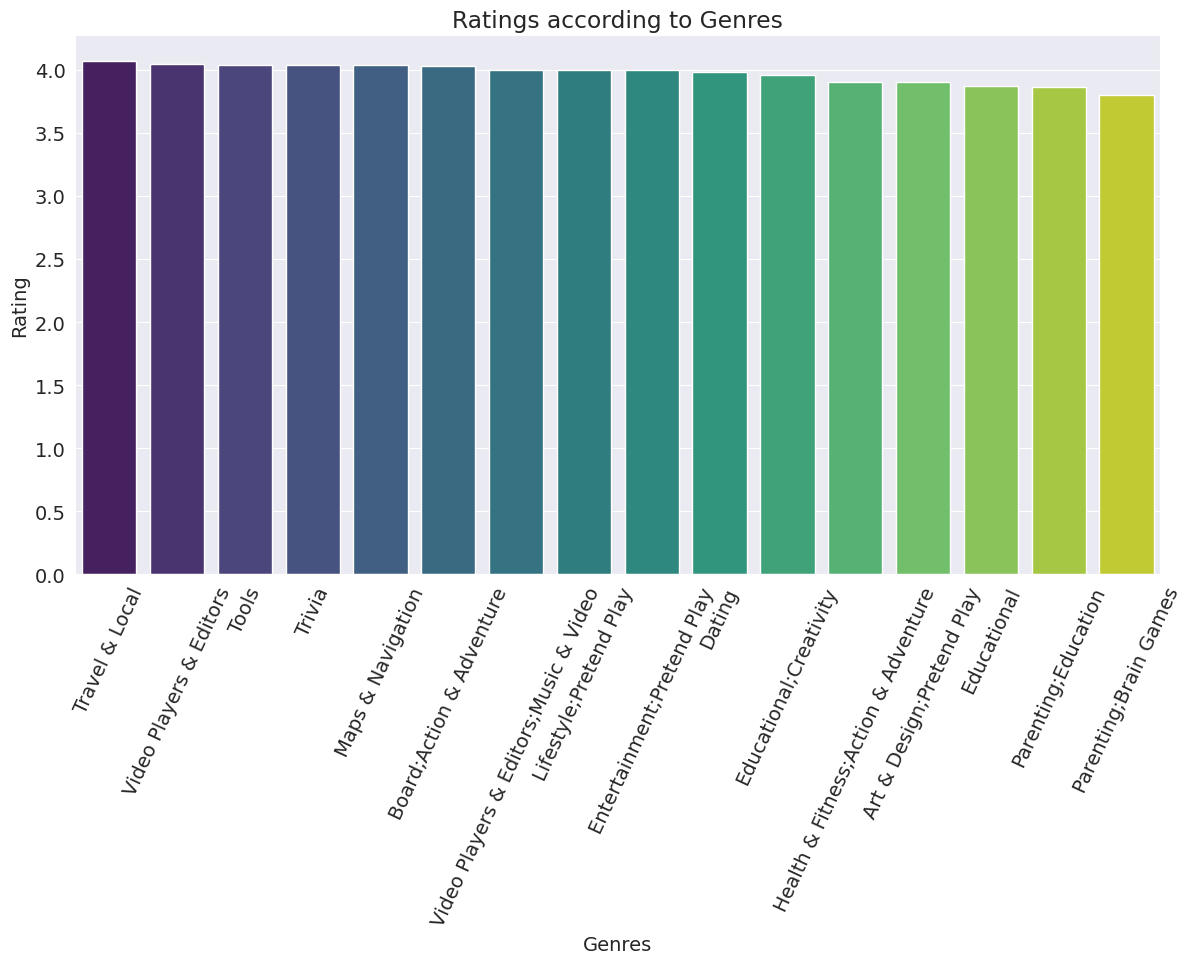

In [48]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Rating")
plt.title("Ratings according to Genres")
sns.barplot(x=lowest_rated_genres.Genres, y=lowest_rated_genres.Rating, palette='viridis')
plt.show()

### 5.7. What are the count of applications in each category differentiated by their type?

In [49]:
app_count = google_play_store_df.groupby(['Category','Type'])[['App']].count().reset_index().rename(columns={'App':'Count','index':'App'})

In [50]:
df_app_count = app_count.pivot('Category', 'Type', 'Count').fillna(0).reset_index()

<ipython-input-50-e157c75e28e9>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_app_count = app_count.pivot('Category', 'Type', 'Count').fillna(0).reset_index()


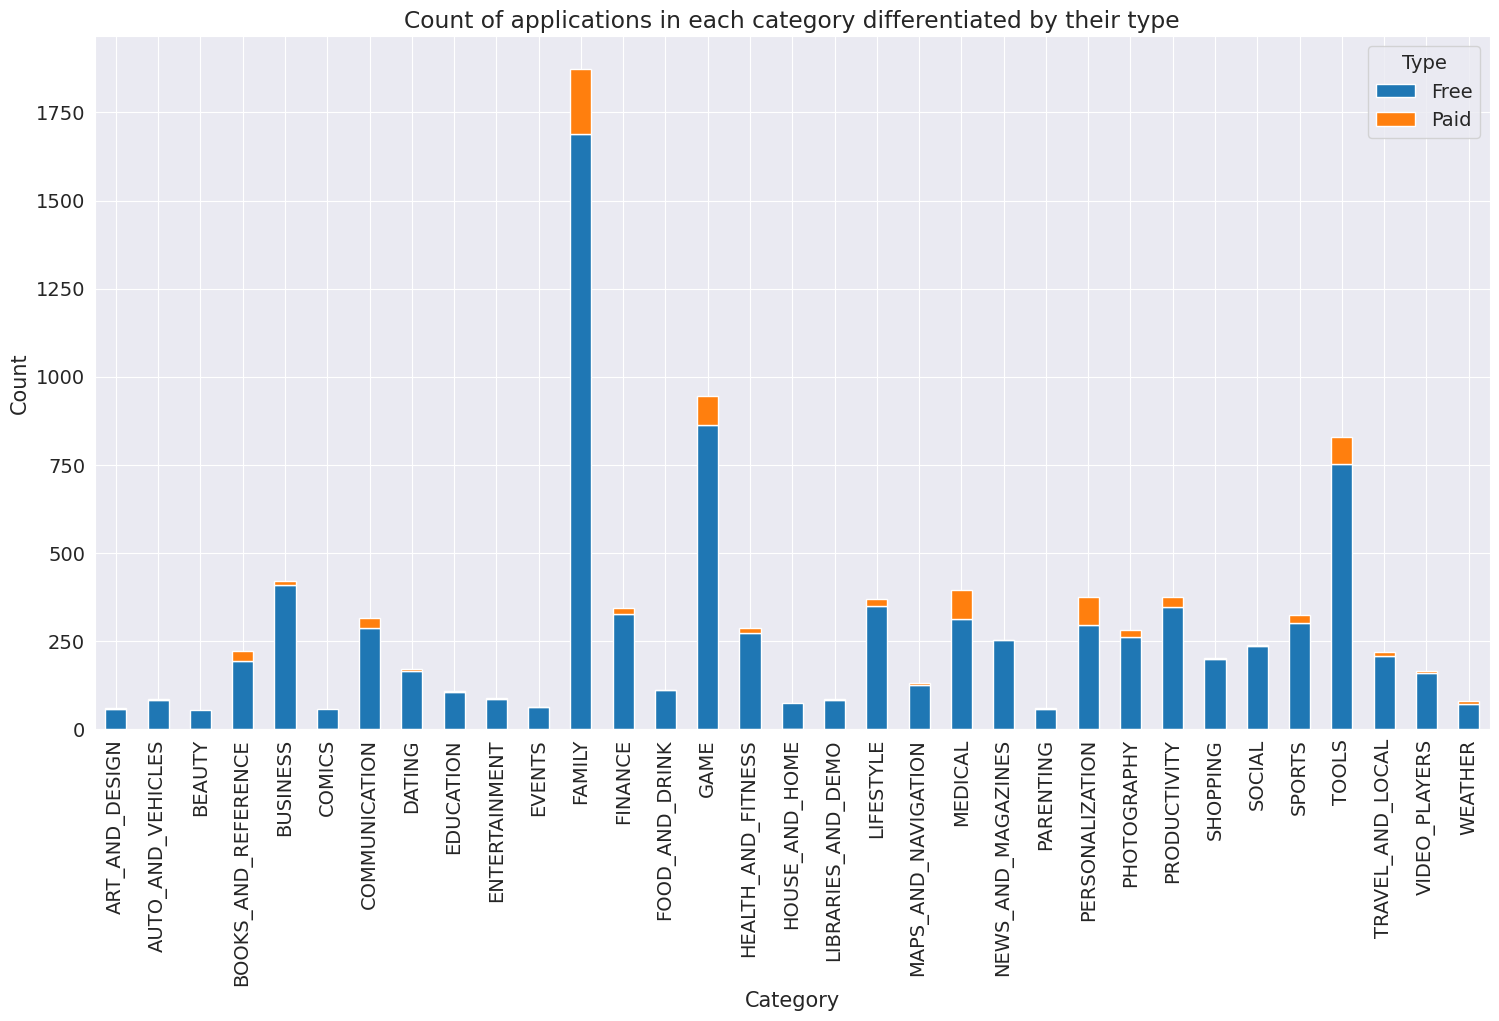

In [51]:
df_app_count.set_index('Category').plot(kind='bar', stacked=True, figsize=(18,9))
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Count of applications in each category differentiated by their type")
plt.show()

It looks like certain app categories have more free apps available for download than others. In our dataset, the majority of apps in Family, Games and Tools, as well as Social categories were free to install. At the same time Family, Personalization and Medical categories had the biggest number of paid apps available for download.

### 5.8. How many apps were installed according to its type?

> Indented block



In [52]:
google_play_store_df['Gaming Category App'] = google_play_store_df['Category']=='GAME'

In [53]:
categoty_type_installs = google_play_store_df.groupby(['Category','Type'])[['Installs']].sum().reset_index()

In [54]:
categoty_type_installs['log_Installs'] = np.log10(categoty_type_installs['Installs'])

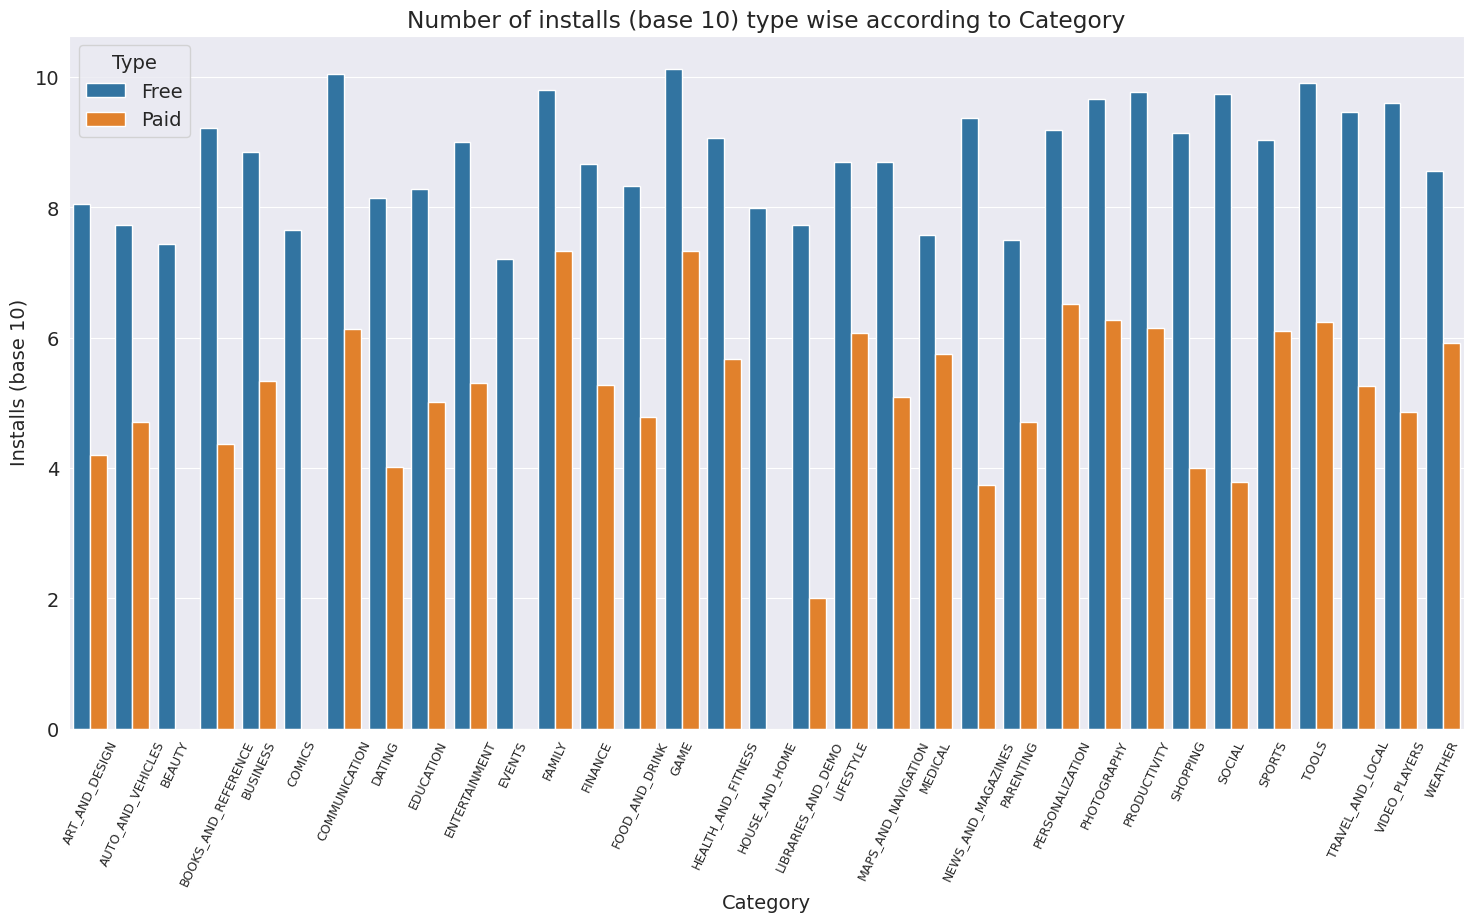

In [58]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=65, fontsize=9)
plt.xlabel("Category")
plt.ylabel("Installs (base 10)")
plt.title("Number of installs (base 10) type wise according to Category")
sns.barplot(x='Category', y='log_Installs', hue='Type', data=categoty_type_installs)
plt.show()


It can be concluded that the number of free applications installed by the user are very high when compared with the paid ones. As we have converted number of installs to it’s log, that is why the difference in the plot between free and paid apps seems to be low.

### 5.9. How does size impact on the number of installs of any application?

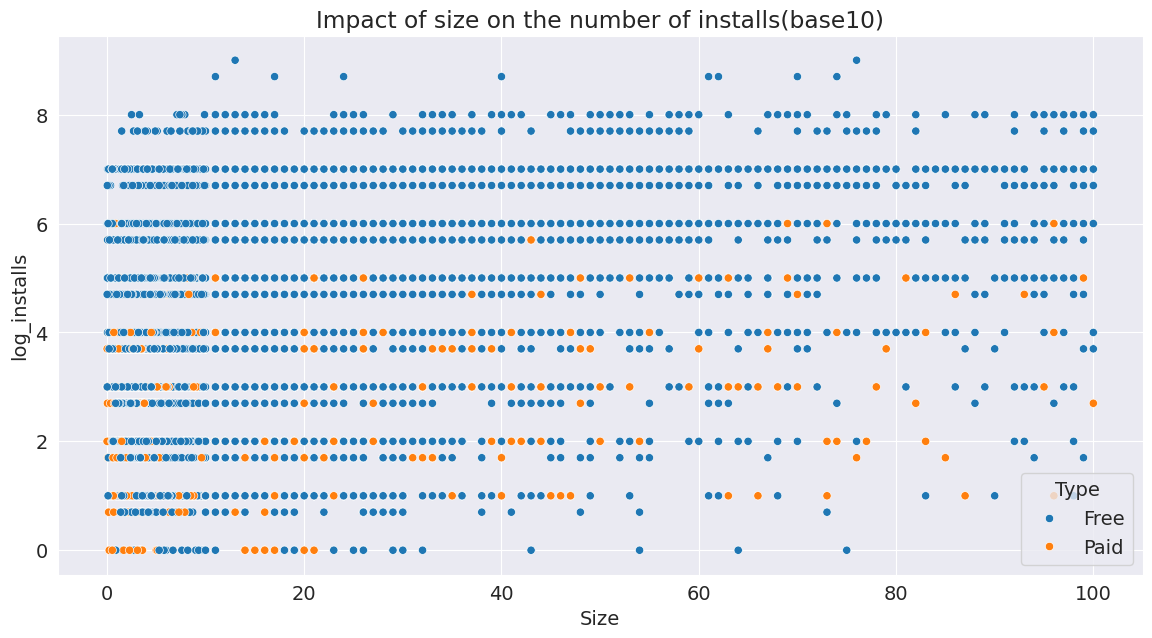

In [60]:
plt.figure(figsize=(14,7))
plt.title("Impact of size on the number of installs(base10)")
sns.scatterplot(x=google_play_store_df['Size'], y=google_play_store_df['log_installs'], hue=google_play_store_df['Type'])
plt.show()

It is clear from the above mentioned plot that size may impact the number of installations. Bulky applications are less installed by the user.

In the merged dataframe, we have three new columns i.e.. Sentiment, Sentiment Polarity and Sentiment Subjectivity. Sentiment basically determines the attitude or the emotion of the reviewer, i.e., whether it is positive or negative or neutral. Sentiment Polarity is a float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Sentiment Subjectivity generally refer to personal opinion, emotion or judgment, which lies in the range of [0,1].

### 5.10. Histogram of log installs

In [61]:
google_play_store_df.loc[google_play_store_df['log_installs']==google_play_store_df['log_installs'].min(),'log_installs']=0

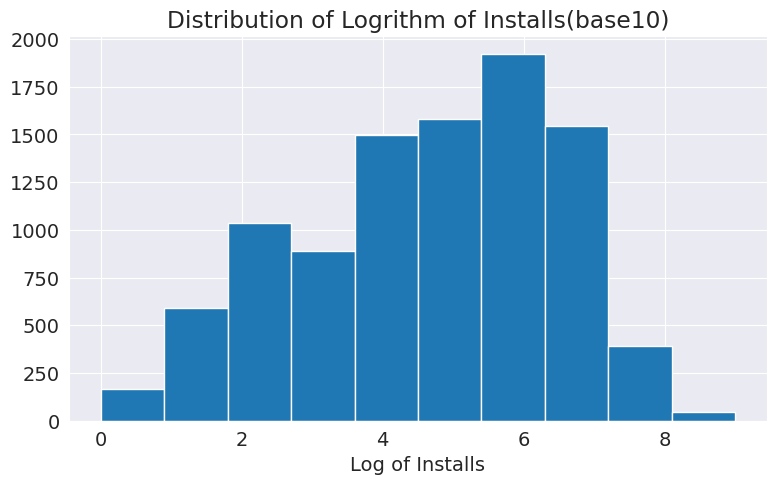

In [62]:
plt.xlabel("Log of Installs")
plt.title("Distribution of Logrithm of Installs(base10)")
plt.hist(google_play_store_df['log_installs']);

### 5.11. Histogram of size

In [63]:
# to remove null values from size column
google_play_store_df.loc[google_play_store_df['Size'].isnull(),'Size']=0

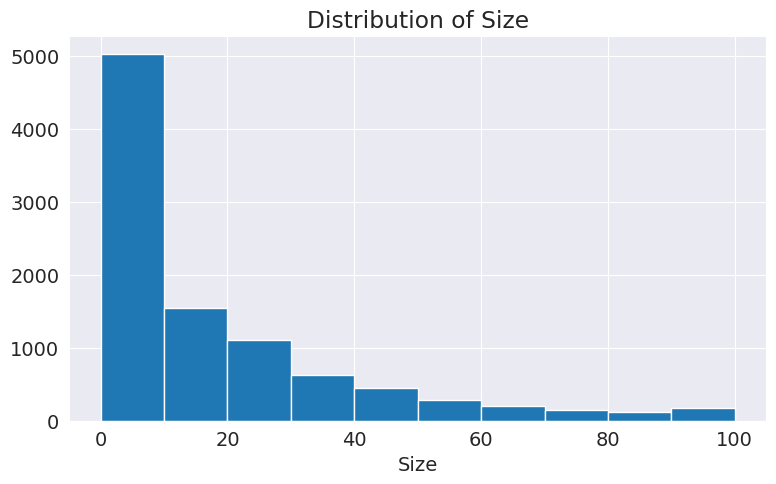

In [64]:
plt.xlabel("Size")
plt.title("Distribution of Size")
plt.hist(google_play_store_df['Size']);
plt.show()

From the above histogram, it can be concluded that maximum number of applications present in the dataset are of small size.

## --> Merging dataframes on apps <--

In [65]:
merged_df = google_play_store_df.merge(user_reviews_df, on="App")

In the merged dataframe, we have three new columns i.e.. Sentiment, Sentiment Polarity and Sentiment Subjectivity. Sentiment basically determines the attitude or the emotion of the writer, i.e., whether it is positive or negative or neutral. Sentiment Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Sentiment Subjectivity generally refer to personal opinion, emotion or judgment, which lies in the range of [0,1].

### 5.11. What is the distribution of type of reviews in the dataset?

In [66]:
category_sentiment = merged_df.groupby(['Category','Sentiment']).size().reset_index(name='Sentiment Count')

In [67]:
category_sentiment['log_sentiment_count'] = np.log2(category_sentiment['Sentiment Count'])

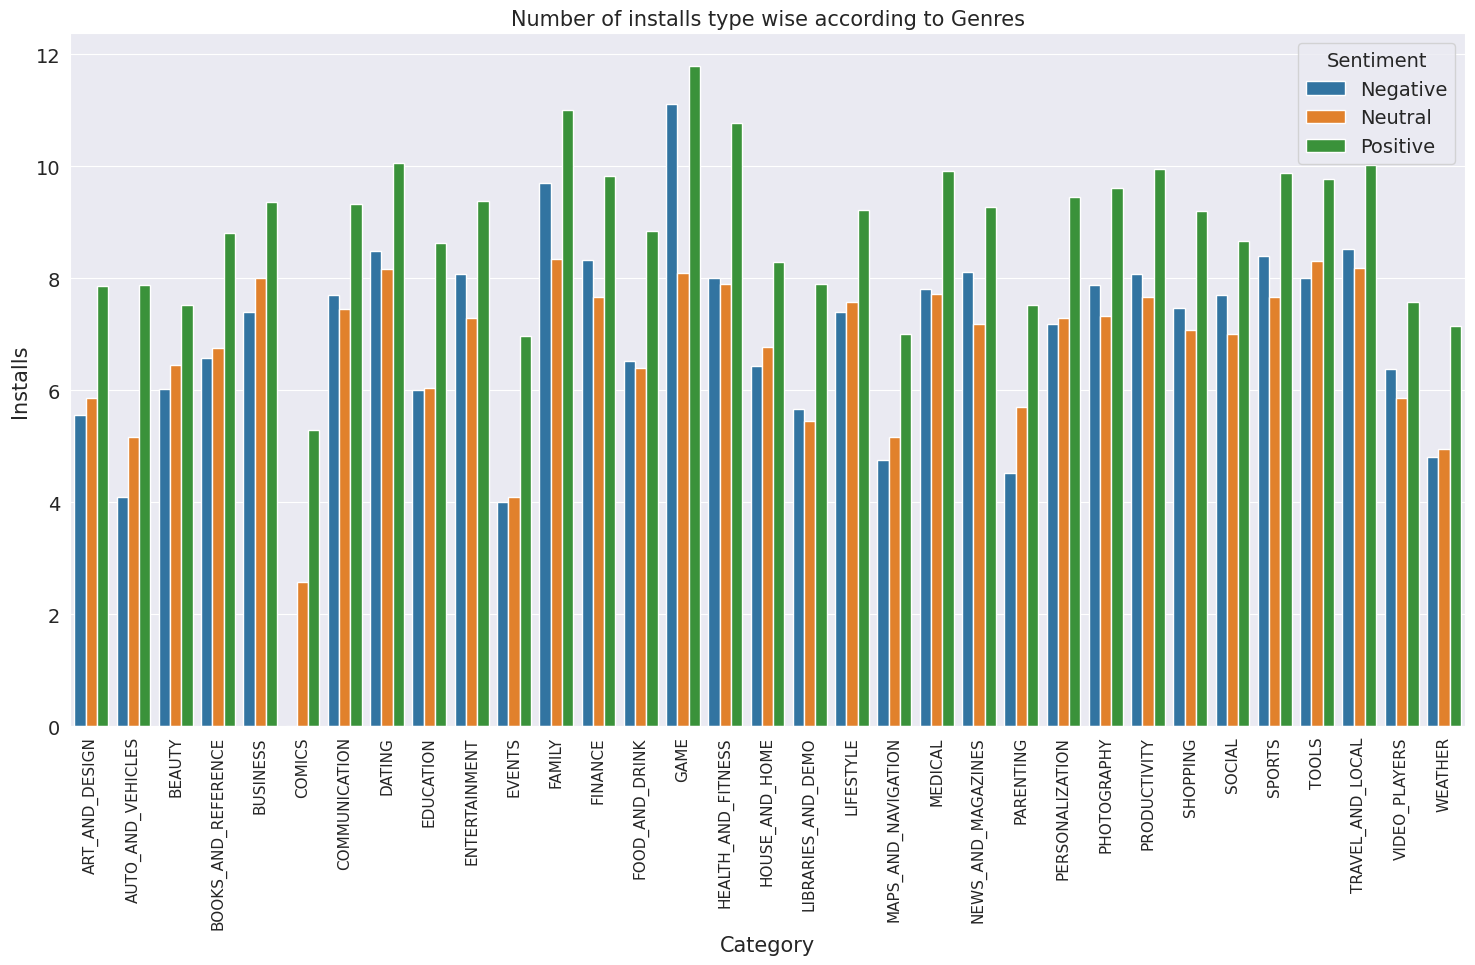

In [68]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=90,fontsize=11)
plt.xlabel("Category", fontsize=15)
plt.ylabel("Installs", fontsize=15)
plt.title("Number of installs type wise according to Genres",fontsize=15)
sns.barplot(x='Category', y='log_sentiment_count', hue='Sentiment', data=category_sentiment);

It can be seen from the above plot that the number of positive reviews are way higher than negetive and neutral ones.

### 5.12. Histogram of subjectivity

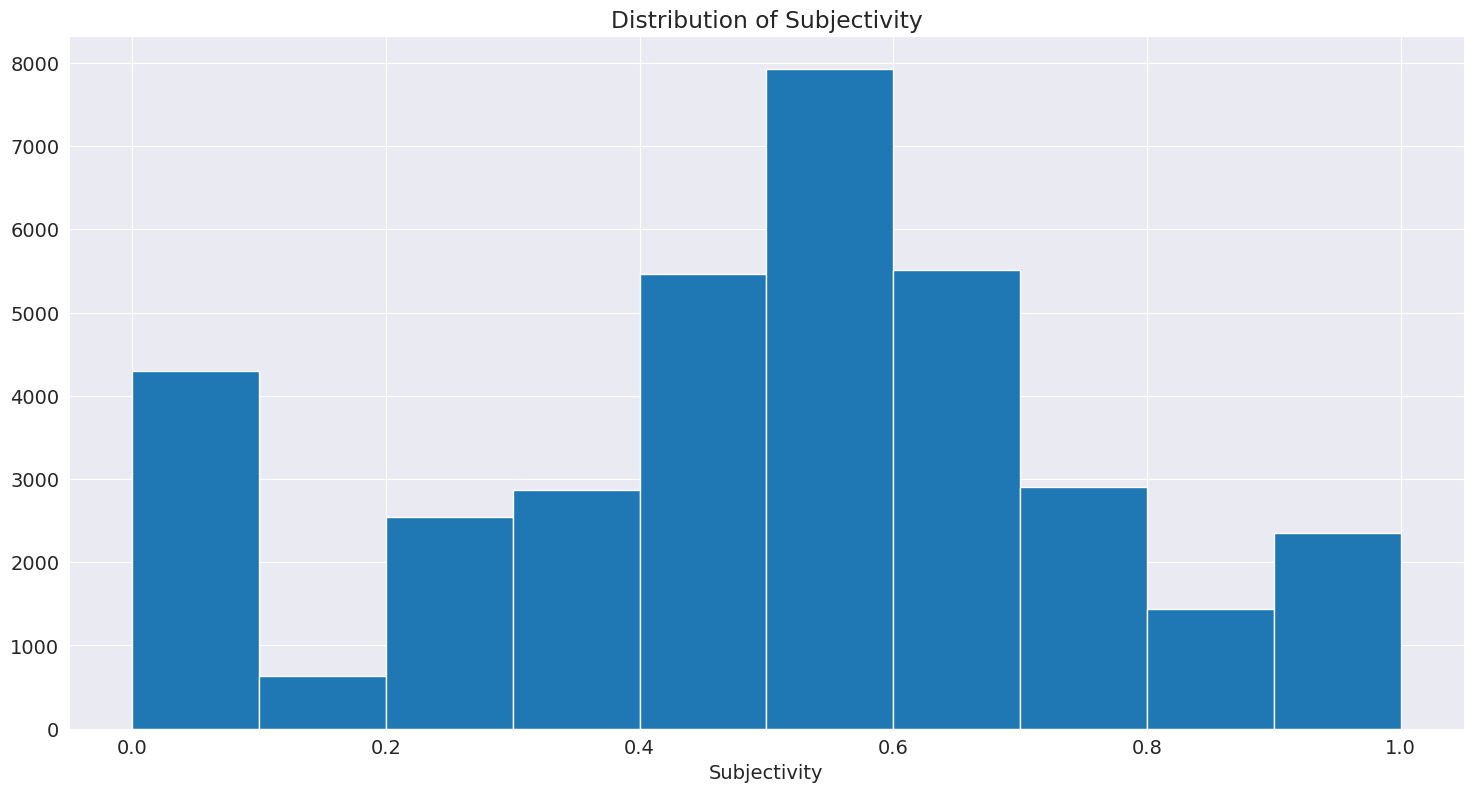

In [69]:
plt.figure(figsize=(18,9))
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(merged_df[merged_df['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'])
plt.show()

It can be seen that maximum number of sentiment subjectivity lies between 0.4 to 0.7. From this we can conclude that maximum number of users give reviews to the applications according to their experience.

### 5.13. Is sentiment subjectivity proportional to sentiment polarity?

In [70]:
sentimet_subjectivity_polarity = merged_df.groupby(['Category'])['Sentiment_Polarity','Sentiment_Subjectivity'].mean().reset_index().rename(columns={'Sentiment_Polarity':'Sentiment_polarity_avg','Sentiment_Subjectivity':'sentiment_subjectivity_avg'})

<ipython-input-70-3c173157a606>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sentimet_subjectivity_polarity = merged_df.groupby(['Category'])['Sentiment_Polarity','Sentiment_Subjectivity'].mean().reset_index().rename(columns={'Sentiment_Polarity':'Sentiment_polarity_avg','Sentiment_Subjectivity':'sentiment_subjectivity_avg'})


In [71]:
merged_df['Sentiment_Subjectivity'] = merged_df['Sentiment_Subjectivity'].abs()

In [72]:
merged_df['Sentiment_Polarity'] = merged_df['Sentiment_Polarity'].abs()

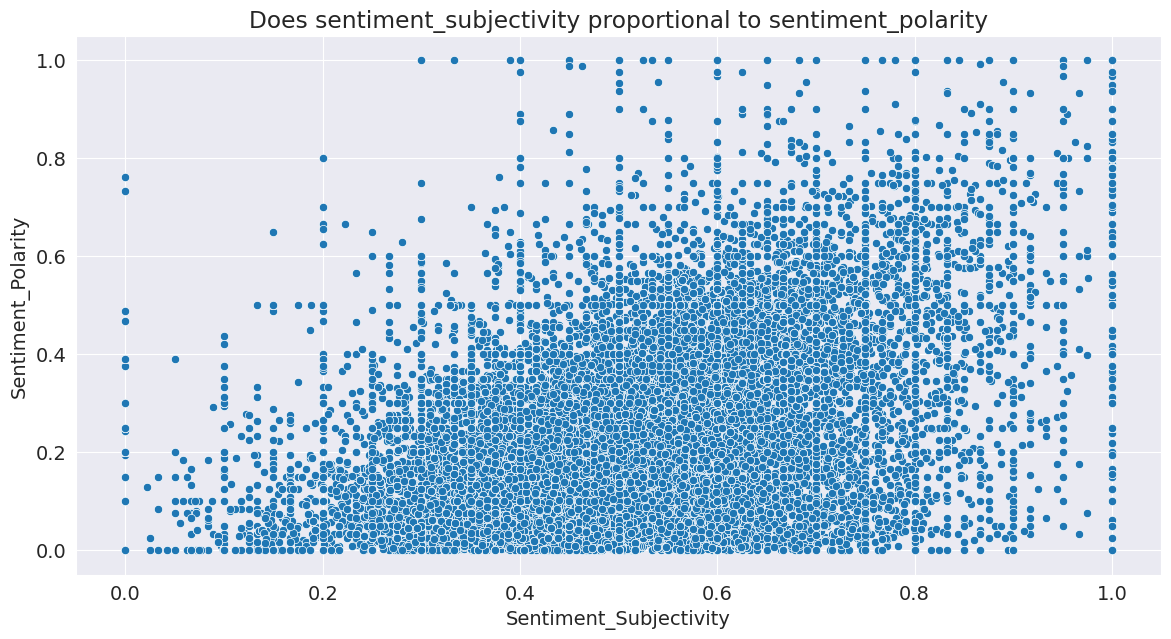

In [74]:
plt.figure(figsize=(14,7))
sns.scatterplot(x=merged_df['Sentiment_Subjectivity'], y=merged_df['Sentiment_Polarity'])
plt.title("Does sentiment_subjectivity proportional to sentiment_polarity")
plt.show()

From the above scatter plot it can be concluded that sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of cases, it shows a proportional behavior when variance is too high or low.

### 5.14. How sentiment is divided for different type of reviews?

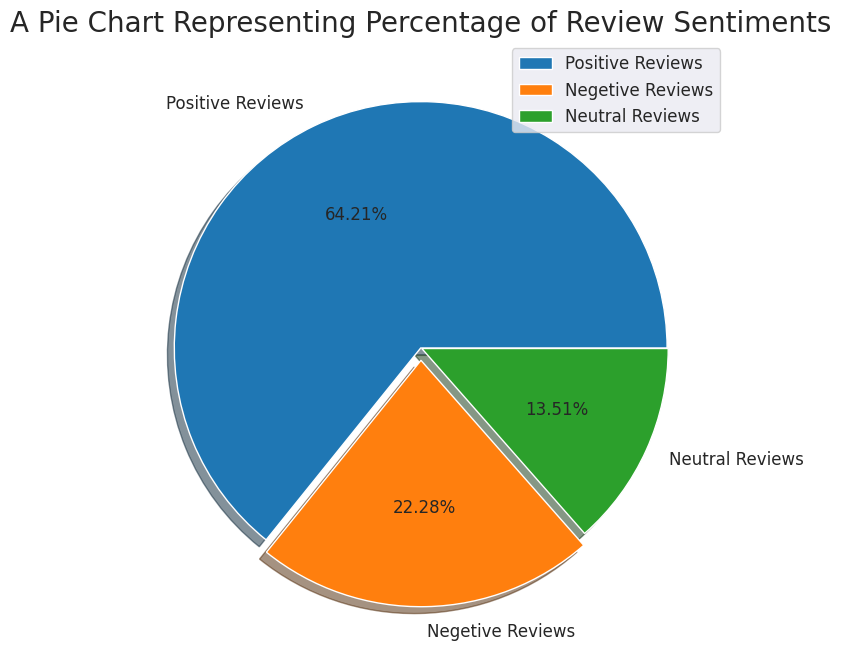

In [78]:
import matplotlib
counts = list(merged_df['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negetive Reviews','Neutral Reviews'
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (8, 8)
plt.pie(counts, labels=labels, explode=[0, 0.05, 0.005], shadow=True, autopct="%.2f%%")
plt.title('A Pie Chart Representing Percentage of Review Sentiments', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

It can be seen from the above plot that the number of positive reviews are way higher than negative and neutral ones.

## WordCloud - A quick look on reviews

In [75]:
!pip install wordcloud -q

In [76]:
review_notnull = merged_df[merged_df['Translated_Review'].notnull()]

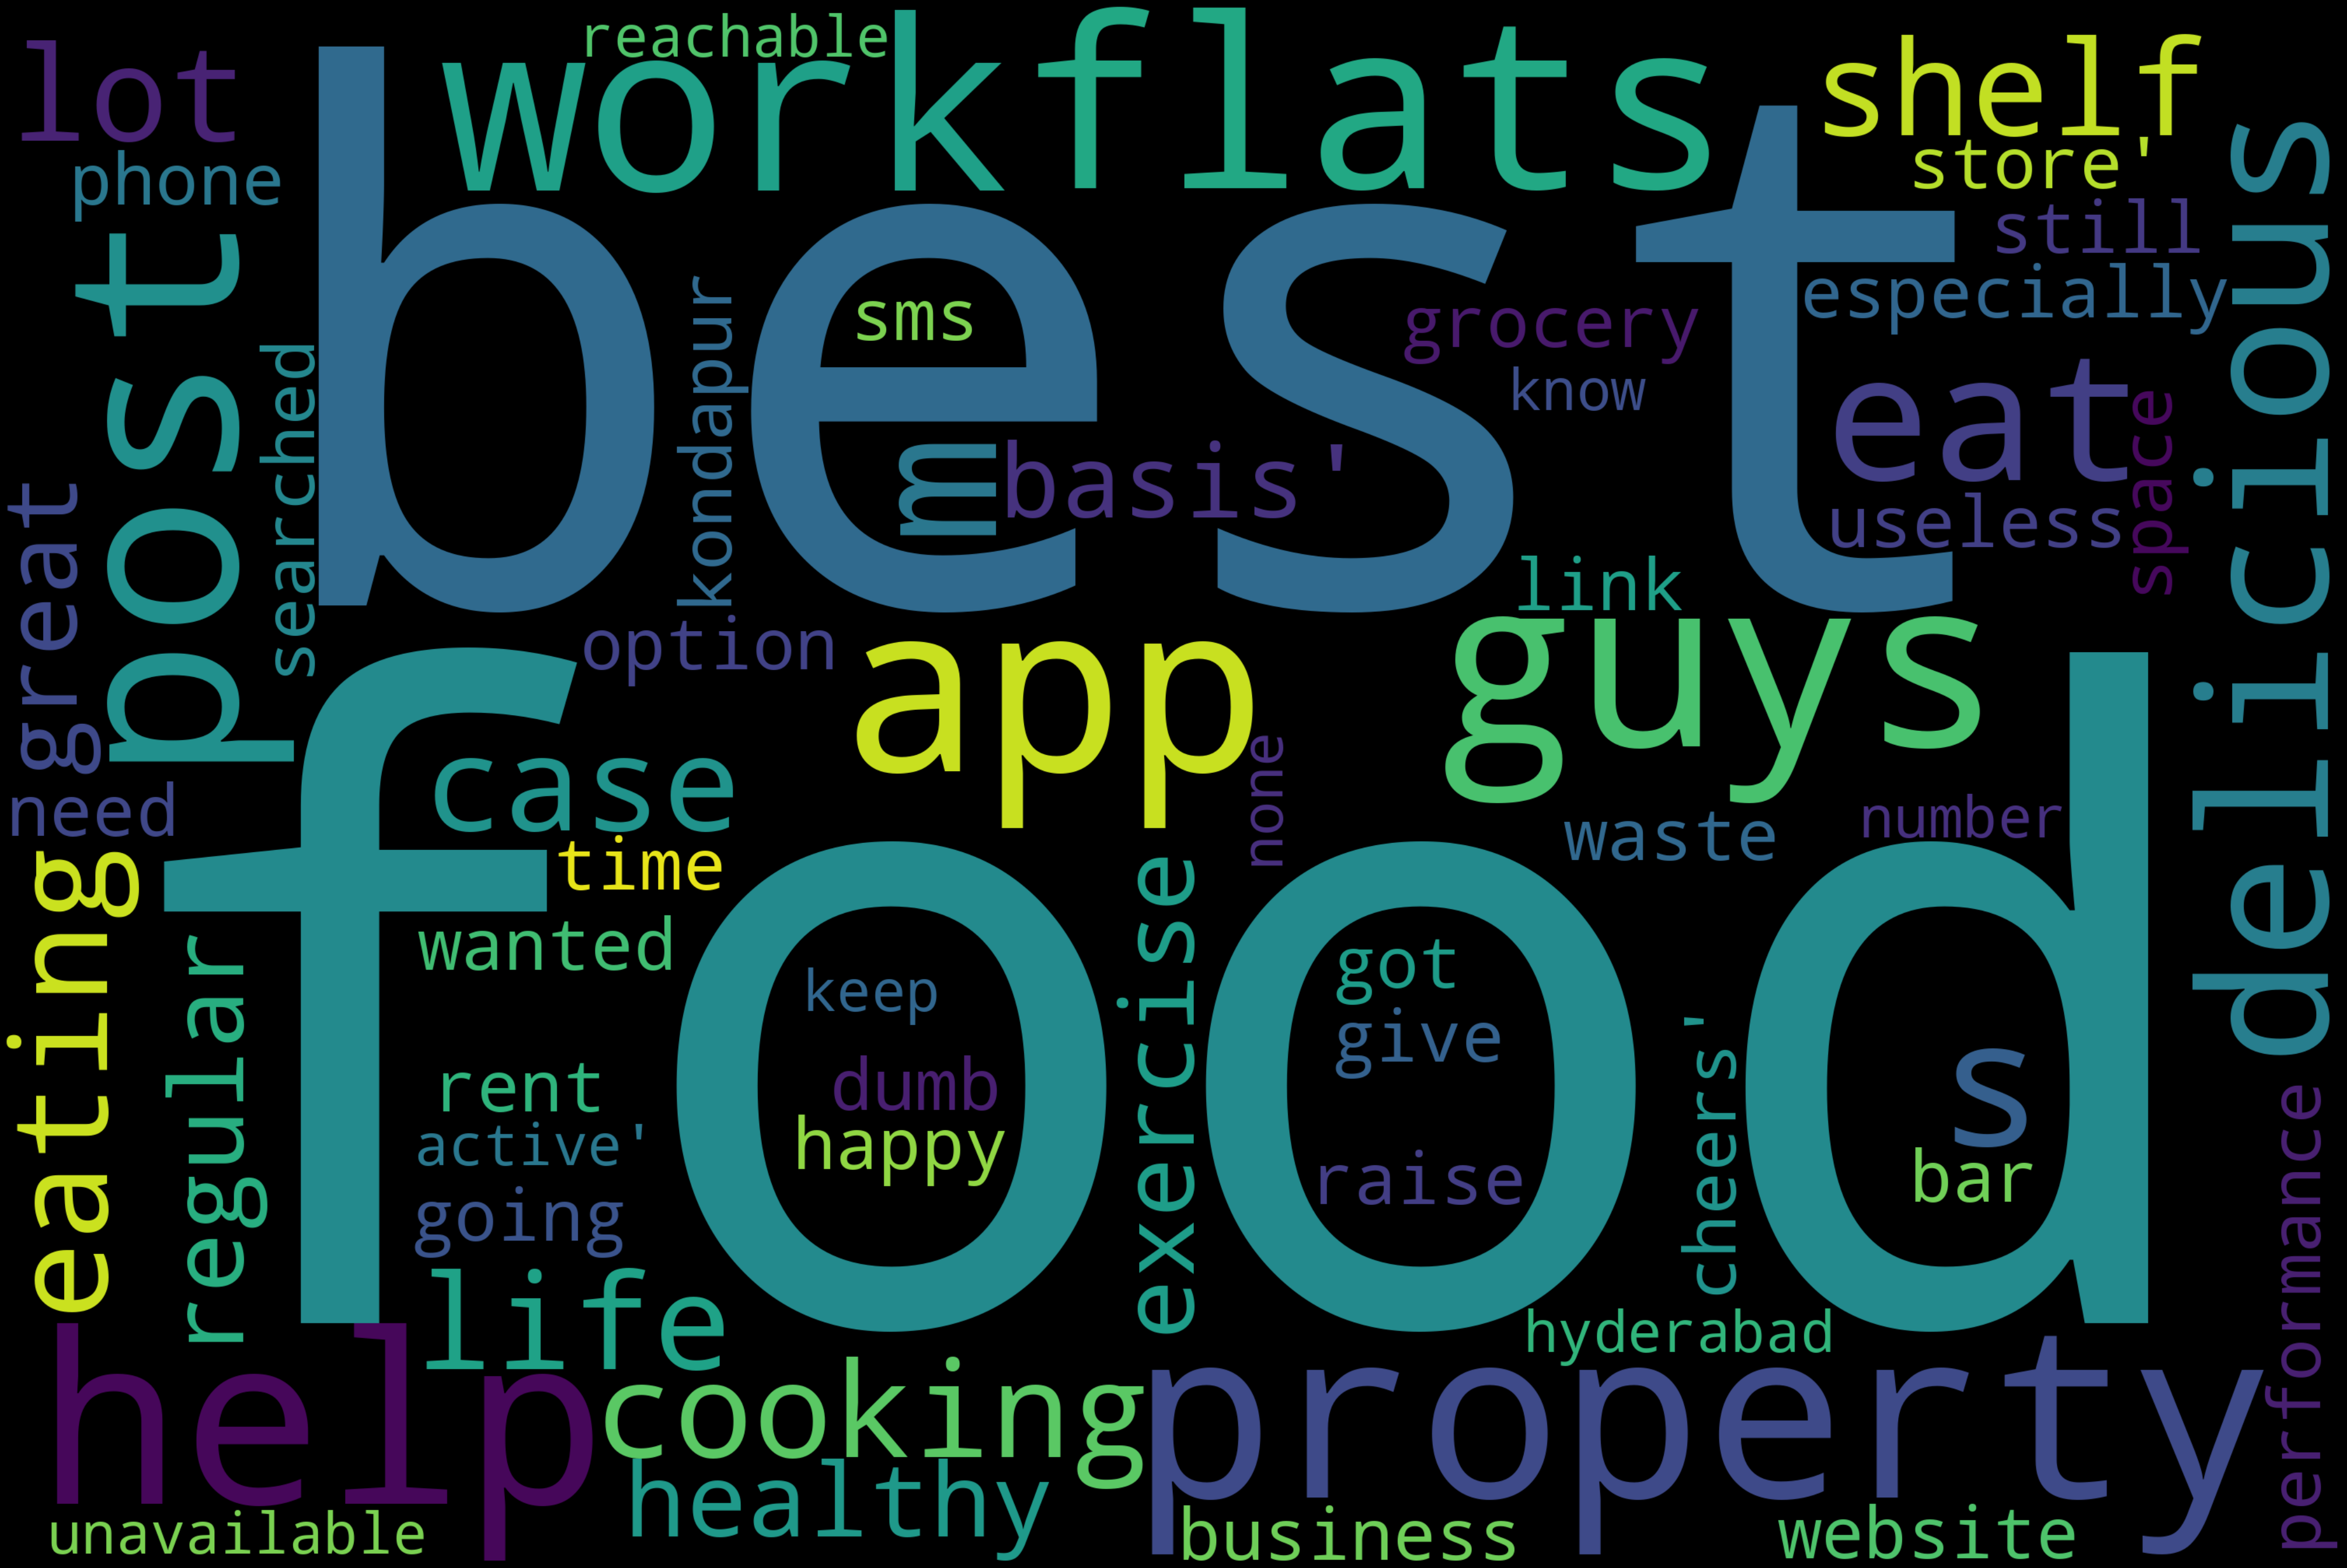

In [77]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = review_notnull.Translated_Review.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text).lower())
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## 6. Conclusion
The dataset contains possibilities to deliver insights to understand customer demands better and thus help developers to popularize the product. Dataset can also be used to look whether the original ratings of the app matches the predicted rating to know whether the app is performing better or worse compared to other apps on the Play Store.


## 7. Future Work
- Exploring the correlation between the size of the app and the version of Android on the number of installs.
- Exploring reviews and sentiment of the users as per the the category of the application.